In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise=np.random.randn(len(x_data))

In [4]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [5]:
noise.shape

(1000000,)

In [6]:
noise

array([ 0.50682985,  1.60659734, -0.35641948, ..., -1.56961961,
       -1.18858094,  0.25967762])

y=mx+b

b=5


In [7]:
y_true=(0.5*x_data)+5+noise

In [8]:
#creating dataframe for x and y
x_df=pd.DataFrame(data=x_data,columns=['X Data'])
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
y_df.head()

,Y
0,5.506830
1,6.606602
2,4.643591
3,5.416995
4,5.111315


In [11]:
my_data=pd.concat([x_df,y_df],axis=1)

In [12]:
my_data.head()

,X Data,Y
0,0.00000,5.506830
1,0.00001,6.606602
2,0.00002,4.643591
3,0.00003,5.416995
4,0.00004,5.111315


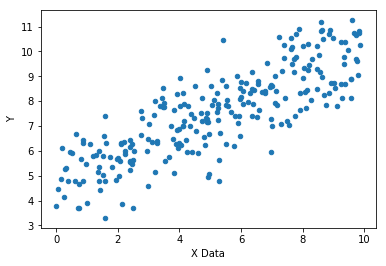

In [13]:
# we can plot these points. But it will be difficult to plot 1 million points
# my_data.plot()
#so we take some random samples from my_data
#pass x_data nad y_data labels in x,y
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')


As there are millions of data we will train the data in batches


In [14]:
batch_size=8

In [15]:
np.random.randn(2)

array([ 0.01076413, -0.33544511])

In [16]:
m=tf.Variable(0.23)
b=tf.Variable(0.45)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
x_ph=tf.placeholder(tf.float32,[batch_size])

In [18]:
y_ph=tf.placeholder(tf.float32,[batch_size])

In [19]:
#this is my graph or model
y_model=m*x_ph+b

In [20]:
#loss function
#you can also do y-yhat**2
error=tf.reduce_sum(tf.square(y_ph-y_model))

In [21]:
#pass error function in optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=optimizer.minimize(error)

In [22]:
init=tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    batches=1000
    for i in range(batches):
        #it chooses 8 random index points
        #it grabs random index points from 0 to len(x_data). It grabs points equal to batch _size
        rand_index=np.random.randint(len(x_data),size=batch_size)
        # taking data from these indexes
        feed={x_ph:x_data[rand_index],y_ph:y_true[rand_index]}
        sess.run(train,feed_dict=feed)
    model_m,model_b=sess.run([m,b])

In [34]:
model_m

nan

In [29]:
y_model

<tf.Tensor 'add:0' shape=(8,) dtype=float32>

In [30]:
model_b

nan